In [1]:
from tools.data import get_datasets

train, test = get_datasets()

Reading data file


In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
from scipy import signal

In [3]:
# Classification -1 vs >=0
# on prépare les données:
# tout ce qui est un chiffre -> 1
# tout ce qui est du bruit -> 0
import numpy as np

train[train[:,-1] >= 0,-1] =  0
test[test[:,-1] >= 0,-1] =  0

train[:,-1] = train[:,-1] + 1
test[:,-1] = test[:,-1] + 1

In [4]:
def butterworth_plot(dataset, n):
    Wn = [('lowpass', 0.035) , ('bandpass', (0.035,0.07)) , ('bandpass', (0.07, 0.113)), ('bandpass', (0.113, 0.26)), ('highpass', 0.26)]
    butter = np.zeros((dataset.shape[0], 20))
    length = dataset[n,0]
    current = []
    plt.figure(figsize=(10, 5))
    plt.plot(dataset[n, 1:1+length])
    plt.plot(dataset[n, 1+512:1+512+length])
    plt.plot(dataset[n, 1+512*2:1+512*2+length])
    plt.plot(dataset[n, 1+512*3:1+512*3+length])
    for filter_type, value in Wn :
        b, a = signal.butter(5, value, filter_type)
        plt.figure(figsize=(10, 5))
        plt.plot(signal.filtfilt(b, a, dataset[n, 1:1+length]))
        plt.plot(signal.filtfilt(b, a, dataset[n, 1+512:1+512+length]))
        plt.plot(signal.filtfilt(b, a, dataset[n, 1+512*2:1+512*2+length]))
        plt.plot(signal.filtfilt(b, a, dataset[n, 1+512*3:1+512*3+length]))
        plt.show()

/Users/Marc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/Marc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/Marc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/Marc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/Marc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/Marc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: DeprecationWarning

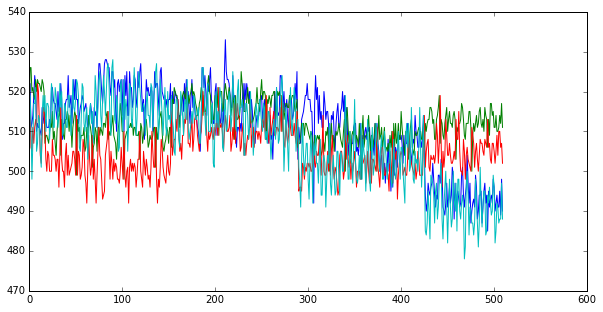

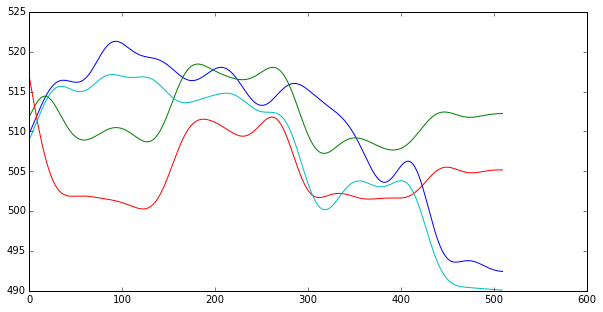

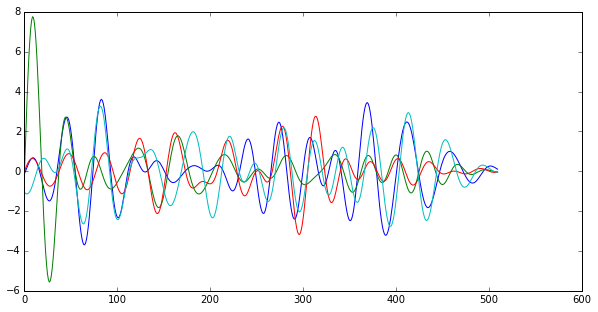

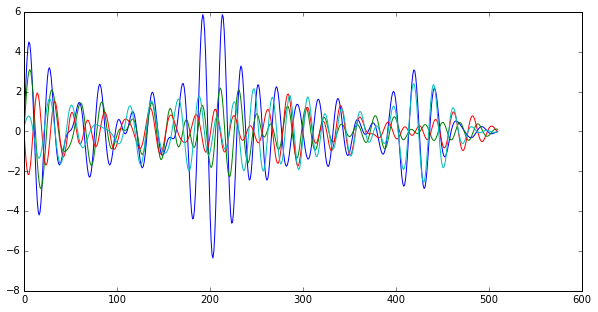

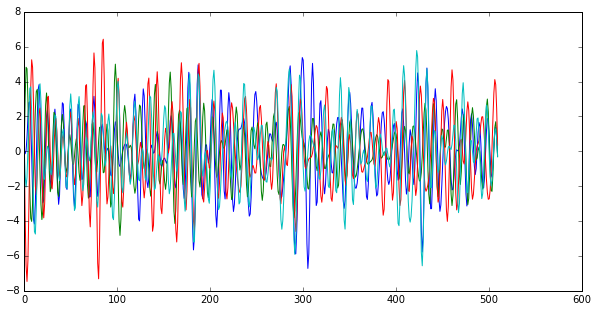

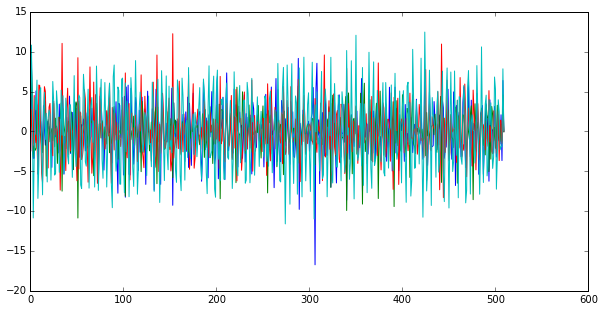

In [5]:
butterworth_plot(train, 24)

In [6]:
def butterworth_filter(dataset):
    Wn = [('lowpass', 0.035) , ('bandpass', (0.035,0.07)) , ('bandpass', (0.07, 0.113)), ('bandpass', (0.113, 0.26)), ('highpass', 0.26)]
    butter = np.zeros((dataset.shape[0], 20))
    for i in range(dataset.shape[0]) :
        length = dataset[i,0]
        current = []
        for filter_type, value in Wn :
            b, a = signal.butter(5, value, filter_type)
            current.append((np.sum(signal.filtfilt(b, a, dataset[i, 1:1+length]))**2)/length)
            current.append((np.sum(signal.filtfilt(b, a, dataset[i, 1+512:1+512+length]))**2)/length)
            current.append((np.sum(signal.filtfilt(b, a, dataset[i, 1+512*2:1+512*2+length]))**2)/length)
            current.append((np.sum(signal.filtfilt(b, a, dataset[i, 1+512*3:1+512*3+length]))**2)/length)
        butter[i] = np.array(current)
    return butter

In [7]:
train_std = butterworth_filter(train)
test_std = butterworth_filter(test)

/Users/Marc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/Marc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/Marc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/Marc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [8]:
# on entraine un kppv pour différentes valeurs de k

from sklearn.neighbors import KNeighborsClassifier

for n in range(1, 20):
    # train set
    neigh = KNeighborsClassifier(n_neighbors=n)
    neigh.fit(train_std, train[:,-1])

    # test set
    total_correct = 0
    for i in range(test_std.shape[0]):
        if neigh.predict(test_std[i])[0] == test[i,-1]:
            total_correct += 1

    print 'Pourcentage correct %d:' % n, float(total_correct) / test_std.shape[0] * 100

Pourcentage correct 1: 83.2104160976
Pourcentage correct 2: 82.2634981335
Pourcentage correct 3: 86.1331148138
Pourcentage correct 4: 86.2605845397
Pourcentage correct 5: 86.825093326
Pourcentage correct 6: 86.8341983065
Pourcentage correct 7: 87.253027406
Pourcentage correct 8: 87.1255576801
Pourcentage correct 9: 87.2621323864
Pourcentage correct 10: 87.617226623
Pourcentage correct 11: 87.5717017208
Pourcentage correct 12: 87.5625967404
Pourcentage correct 13: 87.5899116817
Pourcentage correct 14: 87.6627515251
Pourcentage correct 15: 87.6081216425
Pourcentage correct 16: 87.6263316034
Pourcentage correct 17: 87.3713921515
Pourcentage correct 18: 87.4806519166
Pourcentage correct 19: 87.3896021124
